# Examples

Some examples of how to use the anomaly agent.

<a target="_blank" href="https://colab.research.google.com/github/andrewm4894/anomaly-agent/blob/main/notebooks/examples.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
import os
from IPython.display import Image, display
import pandas as pd
from anomaly_agent.utils import make_df, make_anomaly_config
from anomaly_agent.plot import plot_df_matplotlib as plot_df
from anomaly_agent.agent import AnomalyAgent

pd.set_option("display.max_colwidth", None)

# set openai api key if not in environment
# os.environ['OPENAI_API_KEY'] = "<your-openai-api-key>"

In [2]:
# get and anomaly config to generate some dummy data
anomaly_cfg = make_anomaly_config()
print(anomaly_cfg)

# generate some dummy data
df = make_df(1000, 3, anomaly_config=anomaly_cfg)
df.head()

{'enabled': True, 'fraction': 0.02, 'methods': ['spike', 'drop', 'shift', 'noise'], 'spike_factor': 10, 'shift_value': 3, 'noise_std': 0.2}


,timestamp,var1,var2,var3
0,2020-01-01,0.633373,0.021562,0.622877
1,2020-01-02,0.501127,0.652604,0.744929
2,2020-01-03,0.678100,0.724339,0.684592
3,2020-01-04,0.861511,0.499360,0.938704
4,2020-01-05,0.888935,0.581972,0.065569


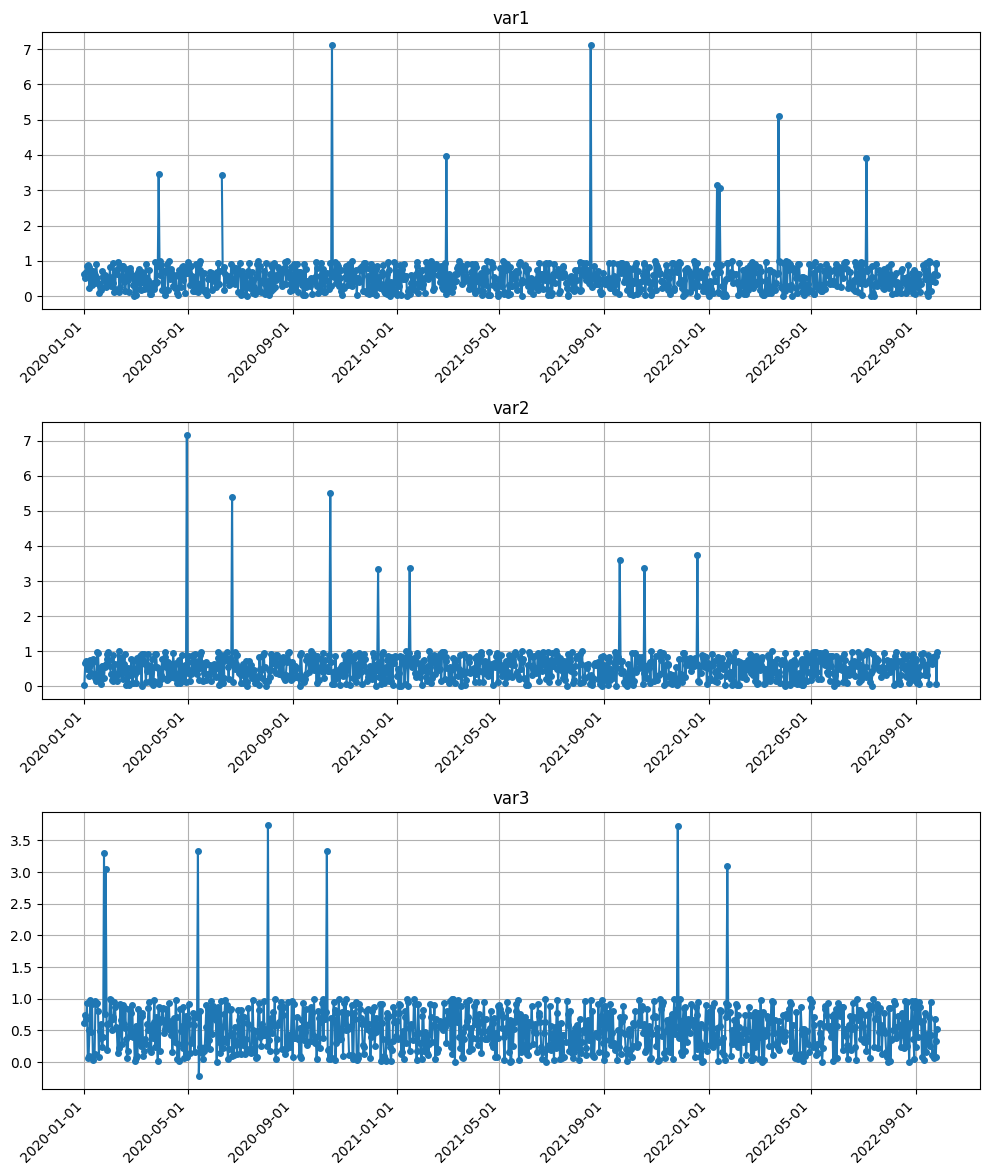

In [3]:
# plot the data
plot_df(df)

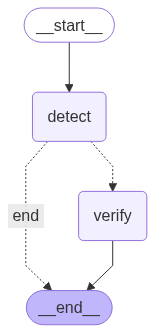

In [4]:
# create anomaly agent
anomaly_agent = AnomalyAgent()

# Display the graph in Mermaid format
display(Image(anomaly_agent.app.get_graph().draw_mermaid_png()))

In [5]:
# detect anomalies
anomalies = anomaly_agent.detect_anomalies(df)

# print anomalies
print(anomalies)

{'var1': AnomalyList(anomalies=[Anomaly(timestamp='2020-01-07 00:00:00', variable_value=0.237146, anomaly_description='Unusually low value compared to previous days.'), Anomaly(timestamp='2020-01-24 00:00:00', variable_value=0.438333, anomaly_description='Sudden drop in value.'), Anomaly(timestamp='2020-01-26 00:00:00', variable_value=0.253033, anomaly_description='Significant outlier compared to surrounding values.'), Anomaly(timestamp='2020-02-28 00:00:00', variable_value=0.003065, anomaly_description='Extreme low value.'), Anomaly(timestamp='2020-03-28 00:00:00', variable_value=3.460696, anomaly_description='Extreme high value significantly above the normal range.'), Anomaly(timestamp='2020-05-13 00:00:00', variable_value=3.335131, anomaly_description='Extreme high value.'), Anomaly(timestamp='2021-01-11 00:00:00', variable_value=3.144747, anomaly_description='Outlier value.'), Anomaly(timestamp='2021-01-14 00:00:00', variable_value=3.053196, anomaly_description='Unreasonably high v

In [6]:
# get anomalies in long format
df_anomalies_long = anomaly_agent.get_anomalies_df(anomalies)
df_anomalies_long.sample(10)

,timestamp,variable_name,value,anomaly_description
30,2022-07-05,var3,3.922606,Significantly high value compared to previous values.
8,2021-02-28,var1,3.959304,Extreme high value detected.
23,2020-05-13,var3,3.335131,Significantly high value compared to previous values.
22,2020-01-26,var3,3.046179,Significantly high value compared to previous values.
31,2021-11-26,var3,3.721674,Significantly high value compared to previous values.
24,2020-05-14,var3,-0.223595,Negative value where positive values are expected.
3,2020-02-28,var1,0.003065,Extreme low value.
12,2020-04-30,var2,7.168549,Severe outlier in var2 value.
28,2022-01-14,var3,3.053196,Significantly high value compared to previous values.
26,2020-10-15,var3,5.513780,Significantly high value compared to previous values.


In [7]:
# get anomalies in wide format
df_anomalies_wide = anomaly_agent.get_anomalies_df(anomalies, format="wide")
df_anomalies_wide.sample(10)

,timestamp,var1,var1_description,var2,var2_description,var3,var3_description
2,2020-01-26,0.253033,Significant outlier compared to surrounding values.,NaN,NaN,NaN,NaN
18,2021-12-19,NaN,NaN,3.740951,Notable spike in var2 value.,NaN,NaN
8,2021-02-28,3.959304,Extreme high value detected.,NaN,NaN,NaN,NaN
19,2022-01-11,NaN,NaN,3.144747,Unusual peak detected in var2.,NaN,NaN
13,2020-05-13,NaN,NaN,3.335131,Extremely high value observed in var2.,NaN,NaN
22,2020-01-26,NaN,NaN,NaN,NaN,3.046179,Significantly high value compared to previous values.
28,2022-01-14,NaN,NaN,NaN,NaN,3.053196,Significantly high value compared to previous values.
3,2020-02-28,0.003065,Extreme low value.,NaN,NaN,NaN,NaN
6,2021-01-11,3.144747,Outlier value.,NaN,NaN,NaN,NaN
31,2021-11-26,NaN,NaN,NaN,NaN,3.721674,Significantly high value compared to previous values.


In [8]:
# merge anomalies with original data
df_final = df.merge(
    df_anomalies_wide,
    on="timestamp",
    how="left",
    suffixes=("", "_anomaly_flag"),
)

df_final.head()

,timestamp,var1,var2,var3,var1_anomaly_flag,var1_description,var2_anomaly_flag,var2_description,var3_anomaly_flag,var3_description
0,2020-01-01,0.633373,0.021562,0.622877,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,0.501127,0.652604,0.744929,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-03,0.678100,0.724339,0.684592,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-04,0.861511,0.499360,0.938704,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-05,0.888935,0.581972,0.065569,NaN,NaN,NaN,NaN,NaN,NaN


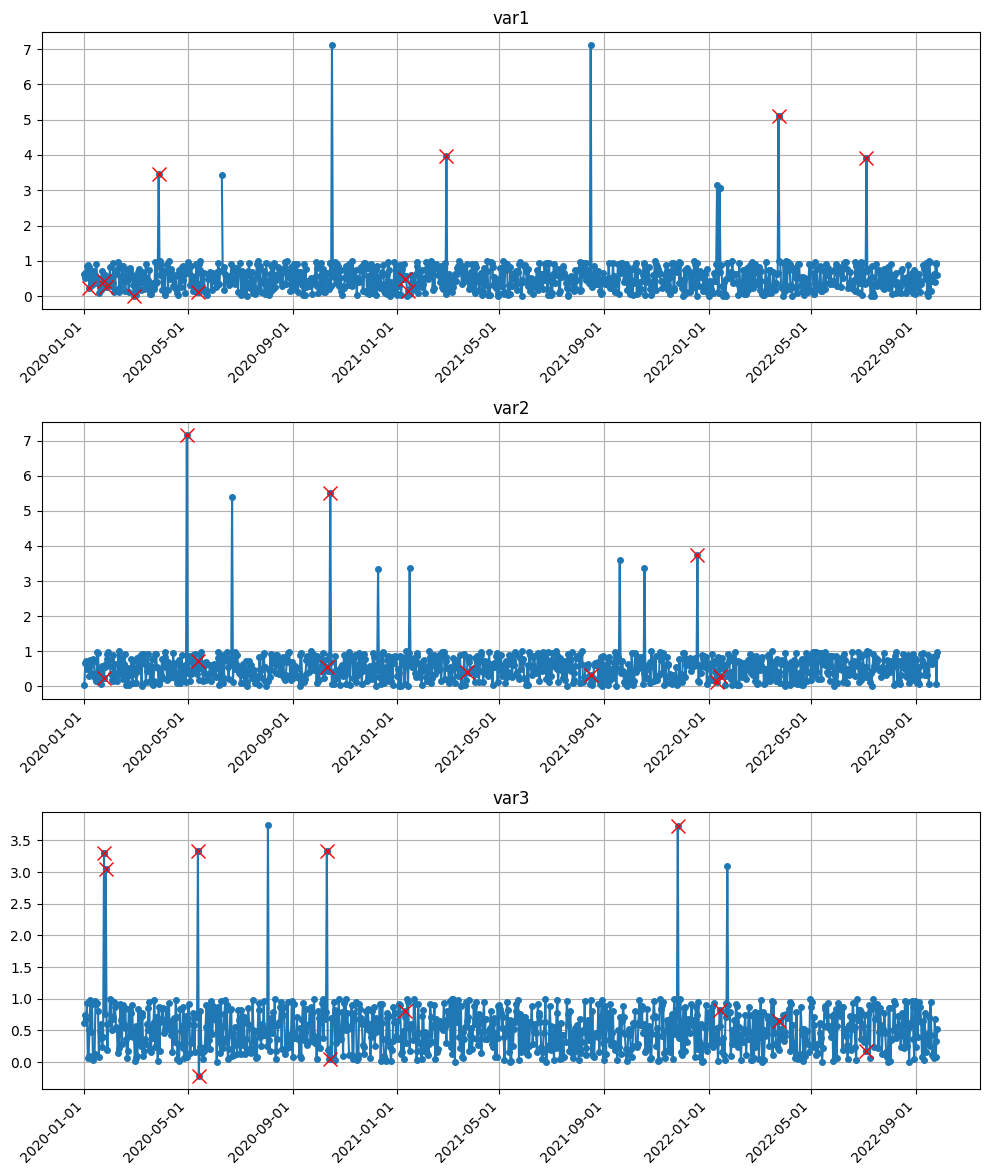

In [9]:
# plot final data with anomalies
plot_df(df_final)